# FishFinder Model
The purpose of this model is to determine the offset locations and scale that allow a standard sized fovea that circumscribes the fish to be retreived.  

The FishNoF model will be transferred directly to this task, as the inputs are identical and tasks are similar (i.e. is a fish present or not versus where is the fish present).  There might be away to tie these tasks together, however I am unsure what to do about ... got it.

FishFinder will be a multitask model that detects whether a fish exists and the correct offsets for fish location with a scale for the image that will produce a standard sized fovea that encapsulates the fish. For `NoF` images, a weight of zero will be applied to the prediction of the offsets and scale.  Thus these images will not contribute to this task of learning.  All images will contribute to the learning of the FishNoF label, however weighting may also be used to aid in training efficiently against the unbalanced training set.   

#### Dependencies

In [1]:
import numpy as np
import tensorflow as tf
from importlib import reload
import os
import pickle
import fish_data as fd
from datetime import datetime

### Load label_dictionary.pickle
Dictionary will serve as a reference for filenames.

In [2]:
with open('label_dictionary.pickle', 'rb') as handle :
    label_dictionary = pickle.load(handle)

### Generate filenames lists for training and validation sets

In [3]:
master = fd.generate_filenames_list()
valid_fnames = []
train_fnames = [] 

for key in master :
    if label_dictionary.get(key).get('valid_set') == True :
        valid_fnames.append(key)
    else :
        train_fnames.append(key)

print("There are {} filenames in the training set".format(len(train_fnames)))
print("There are {} filenames in the validation set".format(len(valid_fnames)))


There are 3577 filenames in the training set
There are 200 filenames in the validation set


### Bundle Validation Coarse Image Array with Labels and Weights 

In [4]:
reload(fd)
help(fd.bundle_mt)

Help on function bundle_mt in module fish_data:

bundle_mt(f_list, label_dictionary, coarse_dims=[64, 112, 3], fov_dim=72)
    Generates an array of coarse images with corresponding labels from
    an input list of filenames.
    
    Returns :
        * coarse_arr - the array of coarse images (batch, y, x, channels).  Will
            need to be processed for network input.
        * is_fish - boolean array that describes whether a fish is present
            in the image
        * coords - float array ( [0,1]) that describes the position of
            the top left corner for a bounding box of the fish.
        * scale - array of floats.  Describes the scale for the high-resolution
            image, such that a bounding box that begins with the `coords` and
            extends in both the y and x directions for the number of pixels
            supplied by `fov_dim`, will produce a fovea that circumscribes the
            entire fish.
        * weights - weighting for coords / scale 

(200, 64, 112, 3) (200, 1)
First coarse image is Fish: [1]


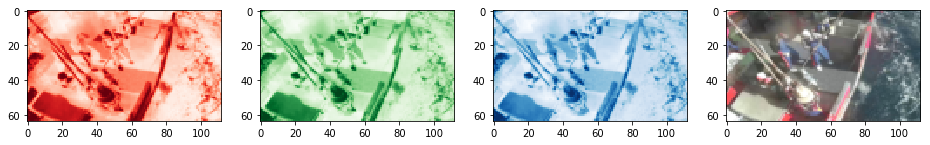

Valid Scales/Coords processed correctly : False
Valid Weights processed correctly : False


In [5]:

valid_coarse, valid_is_fish, valid_box, valid_weights = fd.bundle_mt(valid_fnames, label_dictionary = label_dictionary)
print(valid_coarse.shape, valid_is_fish.shape)
print("First coarse image is Fish: {}".format(valid_is_fish[0]))
fd.show_panel(valid_coarse[0, :, :, :])
print("Valid Scales/Coords processed correctly : {}".format(np.all(valid_box == -1)))
print("Valid Weights processed correctly : {}".format(np.all(valid_weights == 0)))

## Preprocess Validation Coarse Image Array

In [6]:
valid_coarse = valid_coarse.astype(np.float32)
print(np.mean(np.mean(np.mean(valid_coarse, axis =1), axis =1), axis = 0))
for i in range(valid_coarse.shape[0]) :
    valid_coarse[i,:, :, :] = fd.process_fovea(valid_coarse[i,:,:,:], pixel_norm = 'centre', mutation = False)

print(np.mean(np.mean(np.mean(valid_coarse, axis =1), axis =1), axis = 0))

[  97.24441528  108.08731079  104.71770477]
[ 0.76177758  0.88361704  4.7431531 ]


### Set-up and Parameters

In [7]:
version_ID = 'v1.1'
initiate_FishFinder = True 

wd = os.getcwd()
md = wd+'/FishFinder/'+version_ID
if not os.path.exists(md) :
    os.makedirs(md)
tensorboard_path = md+'/Tensorboard_logs'


In [8]:
%run -i 'FishFinder/FishFinder_PARAMS.py'

### Graph 

In [ ]:
%run -i 'FishFinder/FishFinder_GRAPH.py'

### Session

In [ ]:
%run -i 'FishFinder/FishFinder_SESSION.py'

Weight and bias variables initialized!

Checkpoint saver initialized!

Tensorboard initialized!
To view your tensorboard dashboard summary, run the following on the command line:

tensorboard --logdir='/Users/ccthomps/Documents/ML_Projects/Kaggle Competitions/FF3/FishFinder/v1.1/Tensorboard_logs'


TRAINING FishFinder_MT v1.1...
Batch Cost value: 0.775428
Batch Cost value: 0.580664
Batch Cost value: 0.548423
Batch Cost value: 0.469488
Batch Cost value: 0.437308
Batch Cost value: 0.43534
Epoch 1 completed : 3456 coarse images observed in 406.685584 s (9.287272892367879 images/sec). Model Saved!
Batch Cost value: 0.55219
Batch Cost value: 0.508423
Batch Cost value: 0.416082
Batch Cost value: 0.443472
Batch Cost value: 0.517587
Epoch 2 completed : 6912 coarse images observed in 369.153402 s (10.231518874096682 images/sec). Model Saved!
Epoch 3 completed : 10368 coarse images observed in 346.995142 s (10.884878613084446 images/sec). Model Saved!
Epoch 4 completed : 13824 coarse images obse

#### Note
Accidentally stopped the session call.  Will restart from last checkpoint.

In [11]:
initiate_FishFinder = False

In [12]:
%run -i 'FishFinder/FishFinder_GRAPH.py'

In [13]:
%run -i 'FishFinder/FishFinder_SESSION.py'

Loading FishFinder_MT version v1.1
Metadata dictionary loaded!
Initializing restorer...
Weights and biases retrieved!  Picking up at 47 epochs completed : 162432 training images observed
Checkpoint saver initialized!

Tensorboard initialized!
To view your tensorboard dashboard summary, run the following on the command line:

tensorboard --logdir='/Users/ccthomps/Documents/ML_Projects/Kaggle Competitions/FF3/FishFinder/v1.1/Tensorboard_logs'


TRAINING FishFinder_MT v1.1...
Epoch 48 completed : 165888 coarse images observed in 361.018021 s (10.46208161447985 images/sec). Model Saved!
Epoch 49 completed : 169344 coarse images observed in 364.760931 s (10.354727381699767 images/sec). Model Saved!


ValueError: 'arr' does not have a suitable array shape for any mode.

#### Note
Add regularization to dense layers

In [15]:
%run -i 'FishFinder/FishFinder_GRAPH.py'

In [16]:
%run -i 'FishFinder/FishFinder_SESSION.py'

Loading FishFinder_MT version v1.1
Metadata dictionary loaded!
Initializing restorer...
Weights and biases retrieved!  Picking up at 49 epochs completed : 169344 training images observed
Checkpoint saver initialized!

Tensorboard initialized!
To view your tensorboard dashboard summary, run the following on the command line:

tensorboard --logdir='/Users/ccthomps/Documents/ML_Projects/Kaggle Competitions/FF3/FishFinder/v1.1/Tensorboard_logs'


TRAINING FishFinder_MT v1.1...
Epoch 50 completed : 172800 coarse images observed in 354.285376 s (10.660897276211593 images/sec). Model Saved!
Epoch 51 completed : 176256 coarse images observed in 367.342443 s (10.281959169090625 images/sec). Model Saved!
Epoch 52 completed : 179712 coarse images observed in 363.299173 s (10.396390305022797 images/sec). Model Saved!
Epoch 53 completed : 183168 coarse images observed in 375.05615 s (10.070492111647816 images/sec). Model Saved!
Epoch 54 completed : 186624 coarse images observed in 349.267037 s (10.

#### Note 
Experiment with storing the coarse images and retrieving directly instead of loading high resolution and then downsizing for each training example. If the majority of epoch time is loading the images, this should speed up the training significantly (~Loading the coarse image directly is 50x faster than loading full image and resizing.)

In [17]:
from importlib import reload
reload(fd)

<module 'fish_data' from '/Users/ccthomps/Documents/ML_Projects/Kaggle Competitions/FF3/fish_data.py'>

In [19]:
%run -i 'FishFinder/FishFinder_SESSION.py'

Loading FishFinder_MT version v1.1
Metadata dictionary loaded!
Initializing restorer...
Weights and biases retrieved!  Picking up at 82 epochs completed : 283392 training images observed
Checkpoint saver initialized!

Tensorboard initialized!
To view your tensorboard dashboard summary, run the following on the command line:

tensorboard --logdir='/Users/ccthomps/Documents/ML_Projects/Kaggle Competitions/FF3/FishFinder/v1.1/Tensorboard_logs'


TRAINING FishFinder_MT v1.1...
Epoch 83 completed : 286848 coarse images observed in 155.266866 s (24.325859710467785 images/sec). Model Saved!
Epoch 84 completed : 290304 coarse images observed in 164.149402 s (23.009526406925318 images/sec). Model Saved!
Epoch 85 completed : 293760 coarse images observed in 175.79291 s (21.485508147057807 images/sec). Model Saved!
Epoch 86 completed : 297216 coarse images observed in 189.1221 s (19.971224938809375 images/sec). Model Saved!
Epoch 87 completed : 300672 coarse images observed in 133.502481 s (28.29

#### Result 
Training is 55% faster with this strategy!

#### Adjustment
Take Regularization off of the classifying layers

In [20]:
%run -i 'FishFinder/FishFinder_GRAPH.py'

In [21]:
%run -i 'FishFinder/FishFinder_SESSION.py'

Loading FishFinder_MT version v1.1
Metadata dictionary loaded!
Initializing restorer...
Weights and biases retrieved!  Picking up at 475 epochs completed : 1641600 training images observed
Checkpoint saver initialized!

Tensorboard initialized!
To view your tensorboard dashboard summary, run the following on the command line:

tensorboard --logdir='/Users/ccthomps/Documents/ML_Projects/Kaggle Competitions/FF3/FishFinder/v1.1/Tensorboard_logs'


TRAINING FishFinder_MT v1.1...
Epoch 476 completed : 1645056 coarse images observed in 157.827495 s (23.93119145684977 images/sec). Model Saved!
Epoch 477 completed : 1648512 coarse images observed in 159.610072 s (23.663920156617685 images/sec). Model Saved!
Epoch 478 completed : 1651968 coarse images observed in 161.881841 s (23.331832506154903 images/sec). Model Saved!
Epoch 479 completed : 1655424 coarse images observed in 165.558665 s (22.813665476222585 images/sec). Model Saved!
Epoch 480 completed : 1658880 coarse images observed in 196.4